In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis 
#### stating with some exploratory data analysis! by checking out some missing data!

# Missing Data 
#### we can use seaborn to create simple heatmap to see where we are missing data!

In [9]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: >

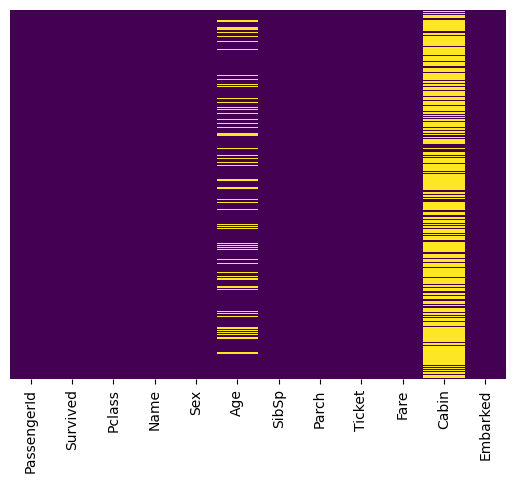

In [10]:
plt.show()

#### Here we see that missing values is present in Age column and Cabin column

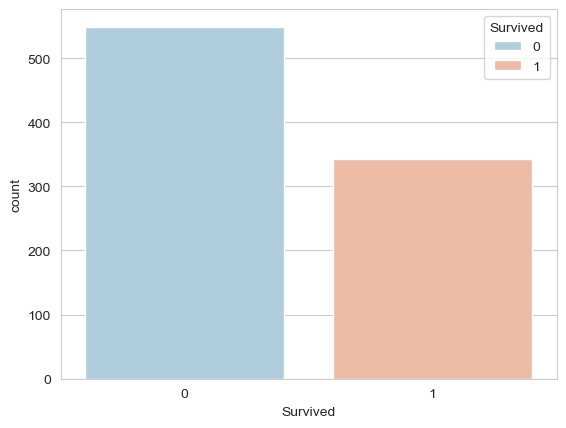

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Survived', palette='RdBu_r', legend=True)
plt.show()

### 0 -> not survived, 1 -> survived

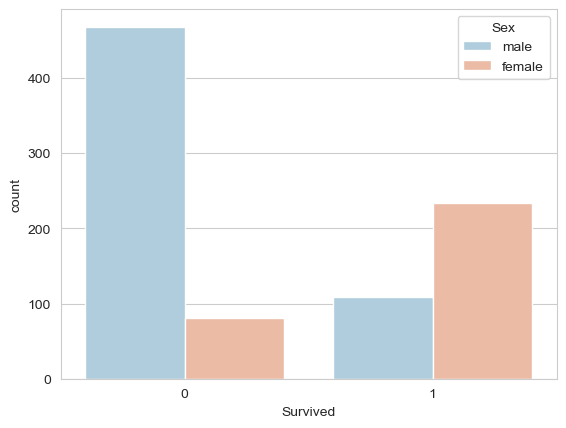

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r', legend=True)
plt.show()

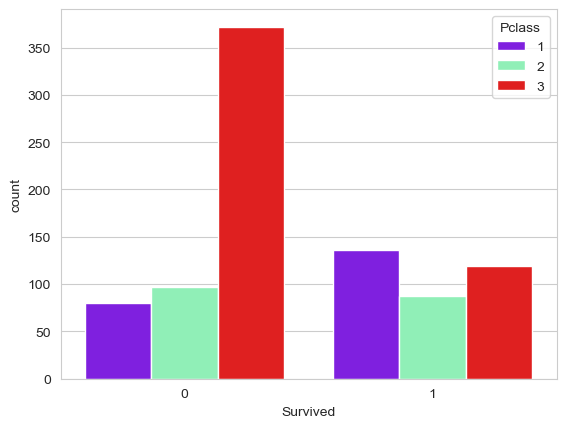

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow', legend=True)
plt.show()

# 0-> Not Survived, 1-> Survived

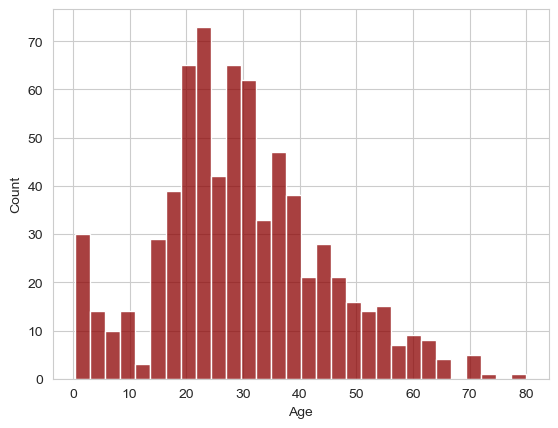

In [38]:
sns.histplot(train['Age'].dropna(), kde=False, color = 'darkred', bins = 30)
plt.show()

# remember .dropna() -> helps to plot graph beacuse it helps to exclude all NaN values 
# and Keeps only the valid age values (non-null)

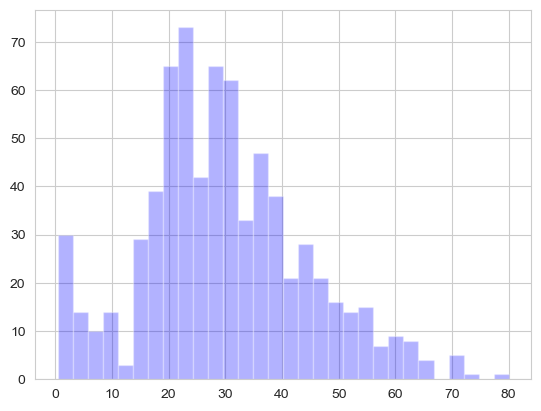

In [41]:
train['Age'].hist(bins=30, color = 'blue', alpha = 0.3)
plt.show()

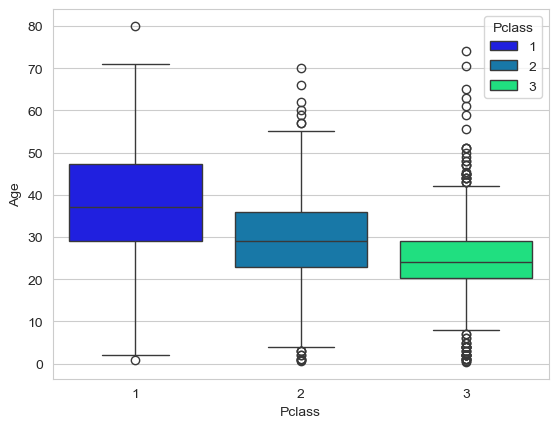

In [60]:
sns.boxplot(x='Pclass', y='Age', data=train, hue = 'Pclass', palette='winter', legend=True)
plt.show()

In [55]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [56]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [57]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

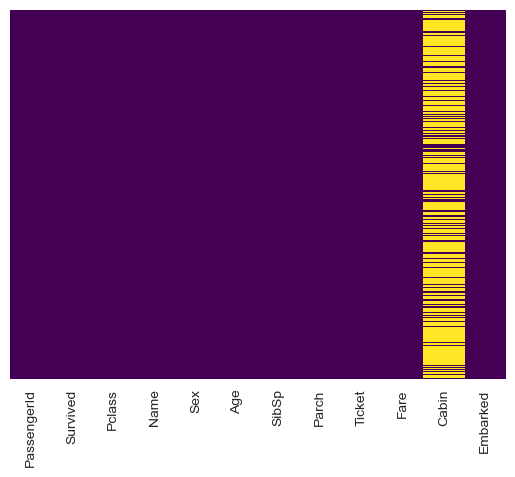

In [58]:
plt.show()

In [59]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Thats how we update the age value by using these Exploratory Data Anaylisis 